In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

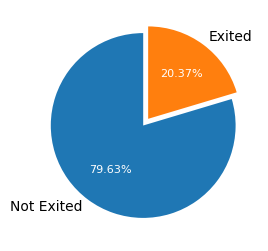

In [21]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3),dpi=100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%',startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
# autotexts[1].set_color('black')
plt.show()

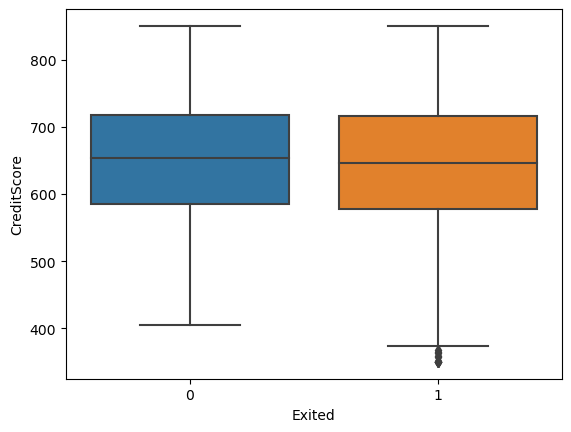

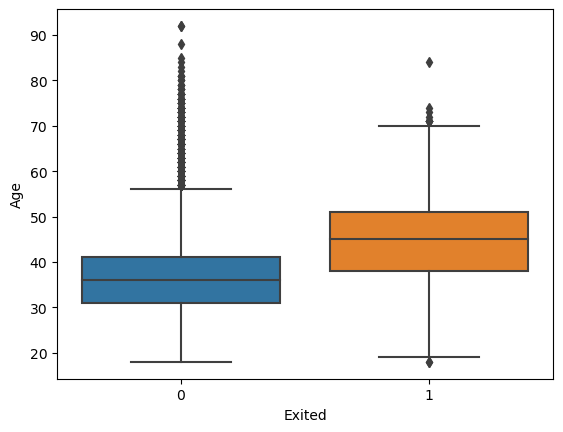

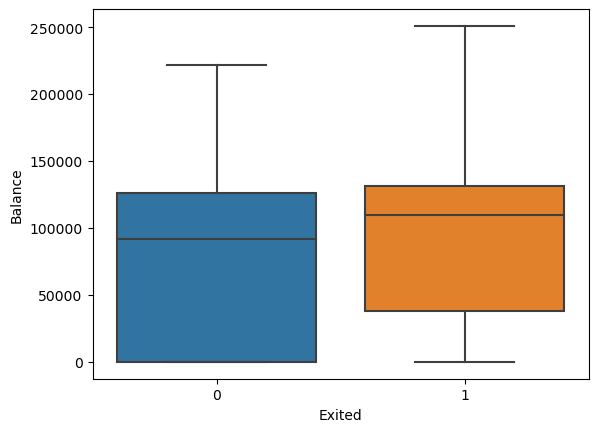

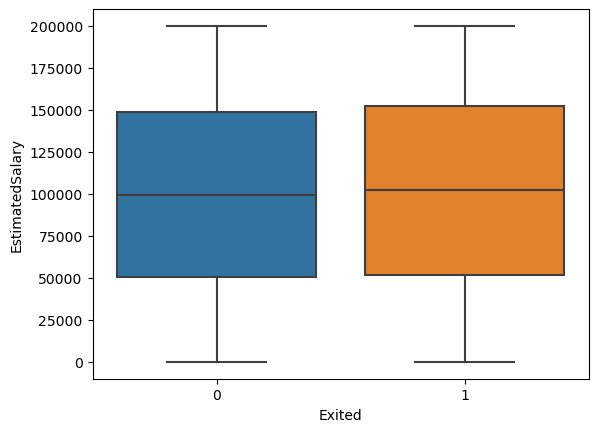

In [24]:
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df)
plt.show()
sns.boxplot(x = 'Exited', y = 'Age', data = df)
plt.show()
sns.boxplot(x = 'Exited', y = 'Balance', data = df)
plt.show()
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df)

plt.show()

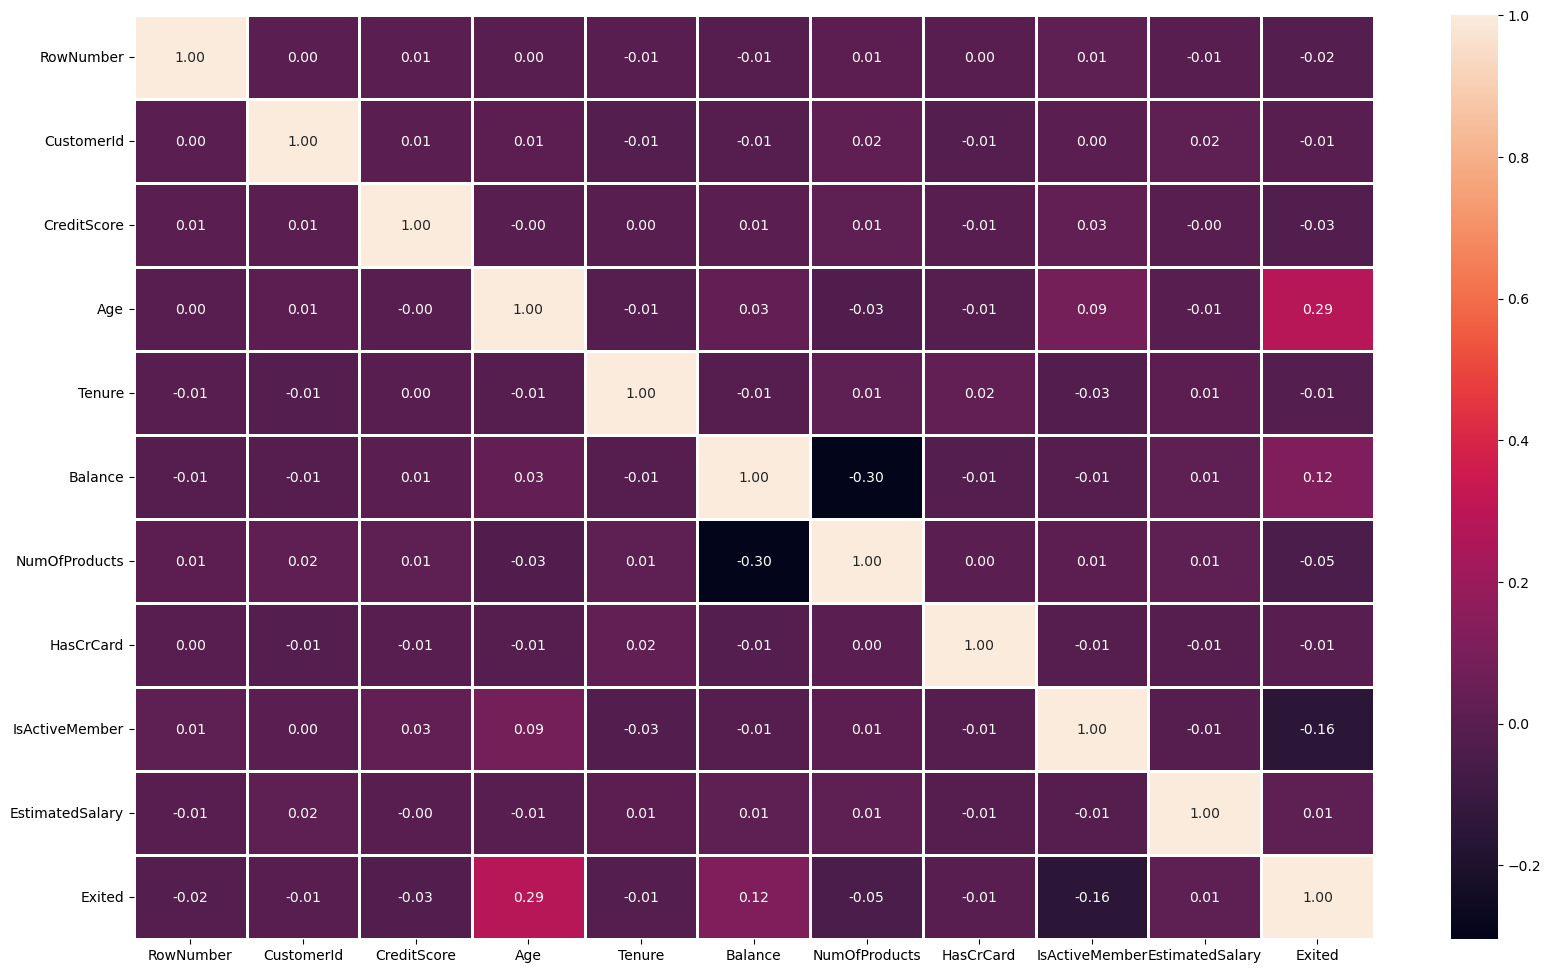

In [25]:
# heatmap to check multicollinearity in data

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [27]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [28]:
geo = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [30]:
X = pd.concat([X,geo,gender],axis=1)

In [31]:
X = X.drop(['Geography', 'Gender'],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [37]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.7850 - val_loss: 0.5828 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7960 - val_loss: 0.5478 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7960 - val_loss: 0.5226 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7960 - val_loss: 0.5045 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7960 - val_loss: 0.4904 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7960 - val_loss: 0.4796 - val_accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7960 - val_loss: 0.4707 - val_accuracy: 0.7975

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8519 - val_loss: 0.3617 - val_accuracy: 0.8555
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8515 - val_loss: 0.3616 - val_accuracy: 0.8560
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8529 - val_loss: 0.3611 - val_accuracy: 0.8555
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8524 - val_loss: 0.3608 - val_accuracy: 0.8565
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8534 - val_loss: 0.3605 - val_accuracy: 0.8560
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8530 - val_loss: 0.3603 - val_accuracy: 0.8560
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8540 - val_loss: 0.3603 - val_accuracy:

In [40]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


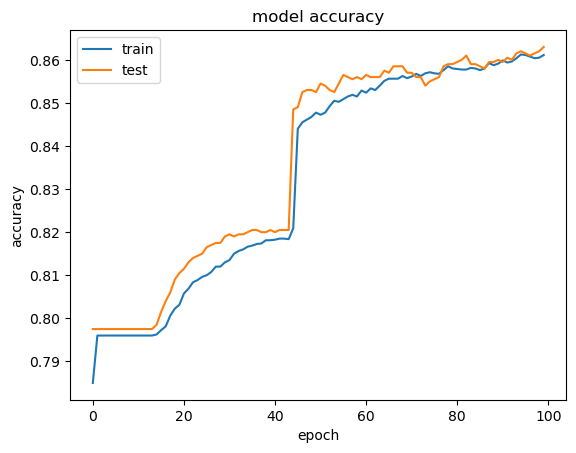

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

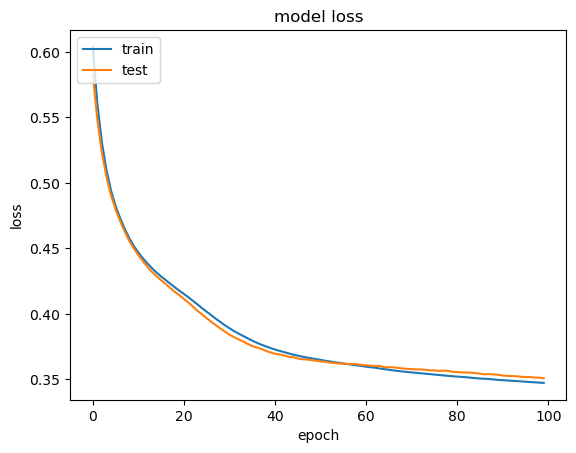

In [43]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

63/63 [==============================] - 0s 1ms/step
[[1531   64]
 [ 210  195]]


0.863